<a href="https://colab.research.google.com/github/MayurBhama/21-Data-Science-Projects/blob/main/Project_04_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Heart Disease Prediction (Classification) 🩺

**Project Objective:** To build a machine learning model that can accurately predict whether a patient has heart disease based on a set of medical attributes. This project will serve as a comprehensive introduction to classification, one of the most common types of machine learning problems.


### Core Concepts We'll Cover:
1.  **Classification Fundamentals:** Understanding the goal of predicting a discrete category.
2.  **Exploratory Data Analysis (EDA) for Classification:** Analyzing features to find patterns that distinguish between classes.
3.  **Data Preprocessing:** Preparing data for classification models using encoding and feature scaling.
4.  **Model Building:** Training and comparing a simple baseline model (Logistic Regression) with an advanced ensemble model (Random Forest).
5.  **Model Evaluation:** Mastering key classification metrics like Accuracy, Precision, Recall, F1-Score, and interpreting the Confusion Matrix.
6.  **Feature Importance:** Identifying the most influential medical factors for predicting heart disease.

### **Theoretical Concept: What is Classification?**

Classification is a type of supervised machine learning task where the goal is to predict a **discrete category or class label**. This is different from regression, where we predict a continuous numerical value.

**Classification vs. Regression:**
- **Classification:** Is this email spam or not spam? (Two classes)
- **Regression:** What will be the price of this house? (Continuous value)

In this project, our goal is to predict one of two classes for a patient: `0` (No Heart Disease) or `1` (Has Heart Disease). This is a **binary classification** problem.

### Step 1: Setup - Importing Libraries and Loading Data

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

sns.set_style('whitegrid')


In [171]:
print('Downloading dataset.....')
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Step 2: Exploratory Data Analysis (EDA)
Before building any models, we need to understand our data deeply. We'll look at the distribution of our target variable, the characteristics of our features, and how they relate to the presence of heart disease.

In [172]:
#Intial inspection
print("Dataset Information")
df.info()

print('\n Description Statistics')
print(df.describe())

#Check for missing values
print("\n Missing Values")
print(df.isna().sum().sum())

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

 Description Statistics
               id         age    trestbps  ...     oldpeak          ca         num
c

In [173]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


#### 2.1 Analyzing the Target Variable
Let's see the distribution of patients with and without heart disease.

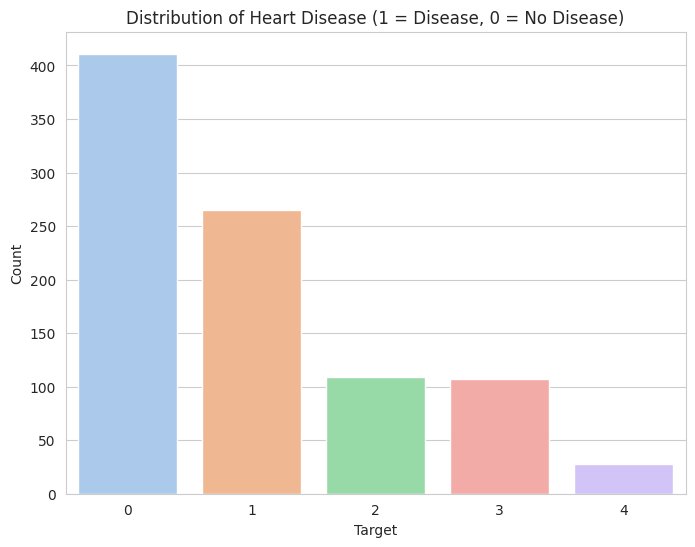

In [174]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'num', data = df, palette = 'pastel' , hue = 'num', legend = False)
plt.title('Distribution of Heart Disease (1 = Disease, 0 = No Disease)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

**Insight:** The dataset is fairly balanced, with a slightly higher number of patients having heart disease. This is good because it means our model will have a similar number of examples for both classes to learn from, and accuracy will be a meaningful metric.

#### 2.2 Analyzing Features vs. Target

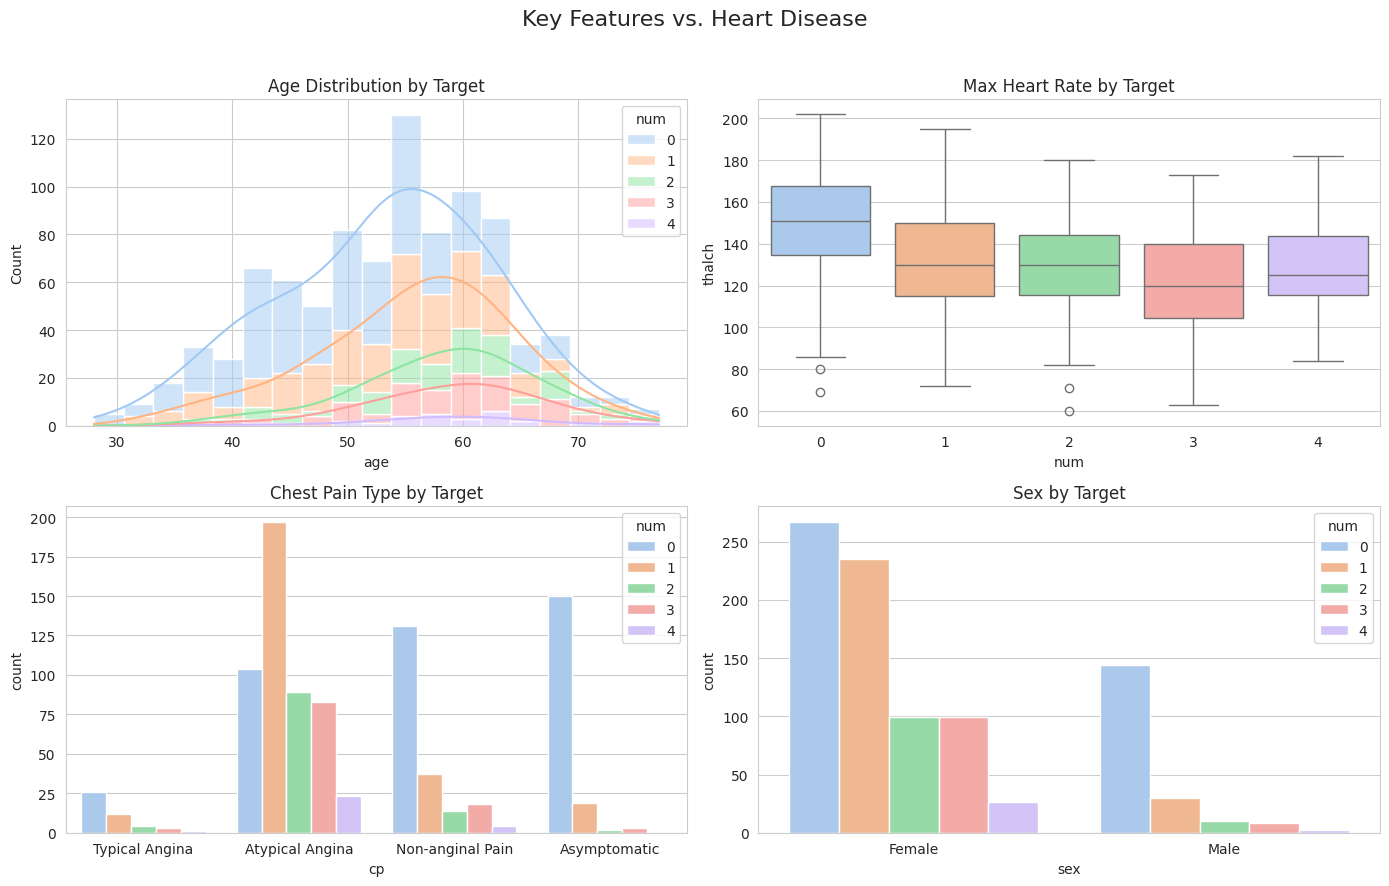

In [175]:
fig, axes = plt.subplots(2,2, figsize = (14,9))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

#Age vs Target
sns.histplot(ax = axes[0,0], data = df ,x = 'age', hue = 'num' , palette = 'pastel', kde = True, multiple = 'stack').set_title('Age Distribution by Target')

#Max Heart Rate vs Target
sns.boxplot(ax = axes[0,1], data = df , x ='num', y = 'thalch', palette = 'pastel', hue = 'num', legend = False).set_title('Max Heart Rate by Target')

#Chest Pain Type vs Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='pastel')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

#Sex vs Target
sex_plot = sns.countplot(ax = axes[1,1], data = df, x = 'sex', hue = 'num', palette = 'pastel')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insights:**
- **Max Heart Rate (`thalach`):** Patients with heart disease tend to have a lower maximum heart rate.
- **Chest Pain (`cp`):** Patients with chest pain types 1 and 2 (Atypical and Non-anginal) are more likely to have heart disease. Surprisingly, those with type 0 (Typical Angina) are less likely, and those with asymptomatic pain (type 3) are very likely to have the disease.
- **Sex:** A higher proportion of females in this dataset have heart disease compared to males.

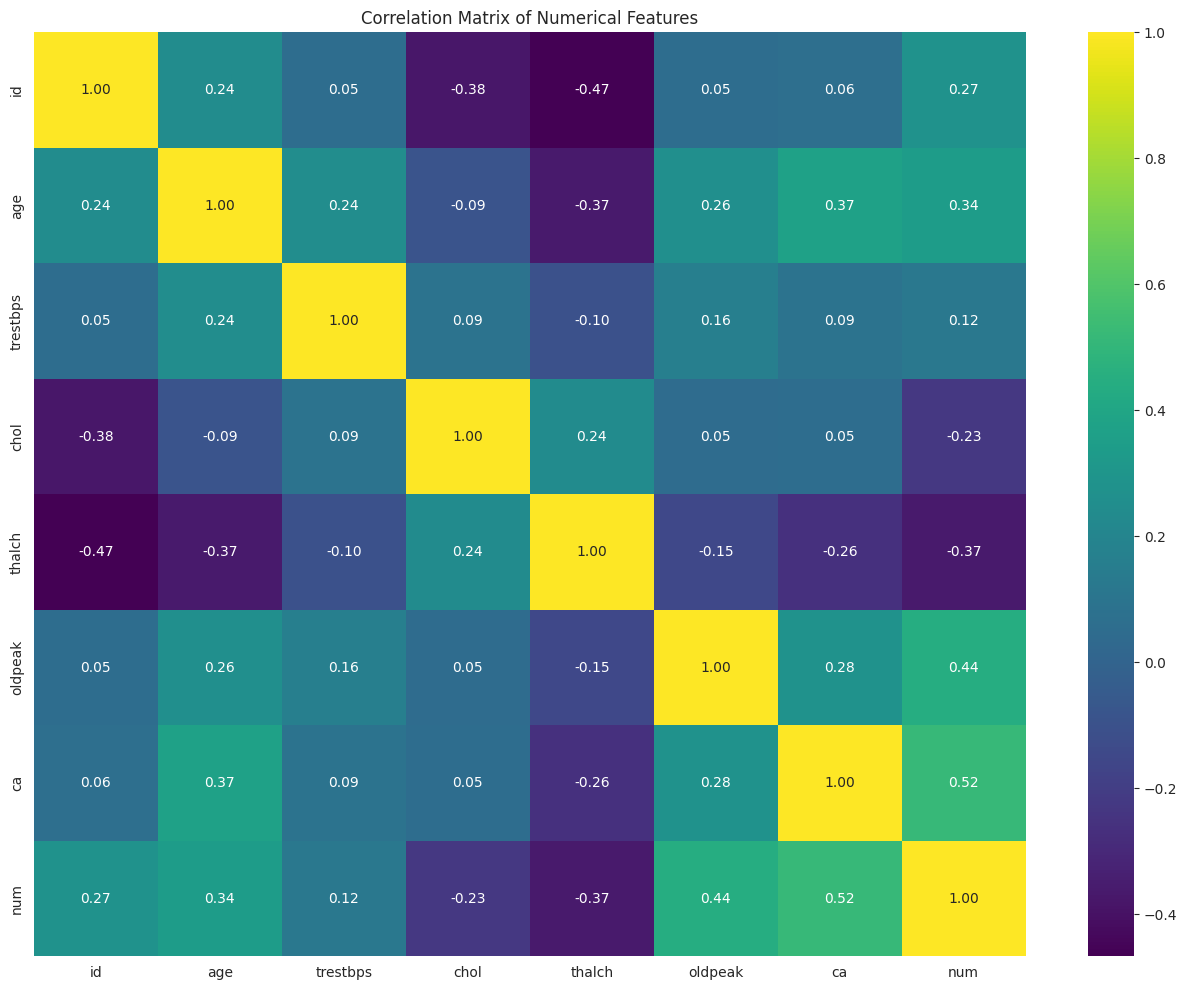

In [176]:
#Correlation Heatmap
plt.figure(figsize= (16,12))
#Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include = np.number)
sns.heatmap(numerical_df.corr(), annot = True, cmap = 'viridis', fmt = '.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Step 3: Data Preprocessing
Even though the data is clean, we need to prepare it for our models. This involves:
1.  **Separating features (X) and target (y).**
2.  **Identifying categorical features** that need to be encoded.
3.  **One-Hot Encoding** categorical features to convert them into a numerical format.
4.  **Scaling numerical features** so they are on a similar scale.

## **Theoretical Concept: Scikit-Learn Pipelines**

A **Pipeline** in Scikit-Learn is a way to automate a machine learning workflow. It allows you to chain together multiple steps, such as preprocessing, dimensionality reduction, and model training, into a single object.

**Why use Pipelines?**

1.  **Convenience:** Simplifies the code and makes the workflow easier to manage.
2.  **Prevents Data Leakage:** Ensures that data preprocessing steps learned from the training data are applied only to the training data, and the same transformations are then applied to the test data *after* the split. This prevents information from the test set from "leaking" into the training process.
3.  **Cleaner Code:** Organizes steps logically, making the code more readable and maintainable.
4.  **Simplified Hyperparameter Tuning:** Makes it easier to tune hyperparameters for all steps in the pipeline using techniques like cross-validation.

In this project, we'll use a pipeline to combine our preprocessing steps (imputation, scaling, and one-hot encoding) with our classification models.

In [177]:
#Removed Pipeline from the code
# Target as binary: 0 = no disease, 1 = disease
y = (df['num']>0).astype(int)
X = df.drop(['num'], axis=1)

# Drop the 'id' and 'dataset' columns as they are not features
X = X.drop(['id', 'dataset'], axis=1)


# Identify categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42, stratify = y)

#Numerical Tranformation
#Imputing the mean value to the numerical columns using a Simple Imputer.
"""
-------------If simpleImputer technique we can write------------
mean = X_train[numerical_features].mean()
X_train[numerical_features] = X_train[numerical_features].fillna(mean)
X_test[numerical_features] = X_test[numerical_features].fillna(mean)
"""
num_imputer = SimpleImputer(strategy = 'mean')
X_train_num = num_imputer.fit_transform(X_train[numerical_features])
X_test_num = num_imputer.transform(X_test[numerical_features])

#Scaling the values using Standard Scaler.
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

#Making a trian and test dataframe of numerical colums
X_train_num = pd.DataFrame(X_train_num, index = X_train.index, columns = numerical_features)
X_test_num = pd.DataFrame(X_test_num, index = X_test.index, columns = numerical_features)

#Categorical Transformation
#Imputing the most_frequent values to the categorical columns using a Simple Imputer.
"""
-------------If simpleImputer technique we can write------------
mode = X_train[categorical_features].mode()[0]
X_train[categorical_features] = X_train[categorical_features].fillna(mode)
X_test[categorical_features] = X_test[categorical_features].fillna(mode)
"""
cat_imputer = SimpleImputer(strategy = 'most_frequent')
X_train_cat = cat_imputer.fit_transform(X_train[categorical_features])
X_test_cat = cat_imputer.transform(X_test[categorical_features])

#Applying OneHotEncoding to the categorical columns to transform the categorical features into numerical
"""
Using OneHotEncoder to encode the categorical features. Could have used pd.get_dummies() as well.
X_train_cat = pd.get_dummies(X_train_cat , drop_first = True])
X_test_cat = pd.get_dummies(X_test_cat, drop_first = True)
"""
ohe = OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False)
X_train_cat = ohe.fit_transform(X_train_cat)
X_test_cat = ohe.transform(X_test_cat)

##Making a trian and test dataframe of categorical colums
cat_cols = ohe.get_feature_names_out(input_features = categorical_features)
X_train_cat = pd.DataFrame(X_train_cat, index = X_train.index, columns = cat_cols)
X_test_cat = pd.DataFrame(X_test_cat, index = X_test.index, columns = cat_cols)

#Concatenating the as a final train data and test data
X_train_final = pd.concat([X_train_num, X_train_cat], axis = 1)
X_test_final = pd.concat([X_test_num, X_test_cat], axis = 1)

In [178]:
X_train_final.shape, X_test_final.shape

((736, 18), (184, 18))

In [179]:
X_train_final.head()

,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
640,-0.063147,1.552552,-1.851654,-6.213904e-01,-8.370095e-01,-2.081215e-16,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
743,2.180526,0.000000,-1.851654,1.129005e-15,-1.052698e-16,-2.081215e-16,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
890,-0.063147,-0.460459,0.390468,-6.213904e-01,1.059362e+00,-2.081215e-16,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
270,0.791586,0.434213,0.058302,1.418278e-02,9.645432e-01,6.646960e-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
654,0.257378,1.272967,-1.851654,-1.535027e+00,-8.370095e-01,-2.081215e-16,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [180]:
print('Checking null values in the final train and test data.......')
print(X_train_final.isna().sum().sum(), X_test_final.isna().sum().sum())
print('\nChecking mean and std of scaled data......')
print(X_train_final.describe().T[['mean','std']].head())

Checking null values in the final train and test data.......
0 0

Checking mean and std of scaled data......
                  mean      std
age       3.632360e-16  1.00068
trestbps -1.828248e-16  1.00068
chol     -8.930055e-17  1.00068
thalch    7.047503e-16  1.00068
oldpeak  -2.896234e-17  1.00068


### Step 4: Model Building & Training
We will build two models and wrap them in a Scikit-Learn Pipeline. The pipeline will automatically apply our preprocessing steps to the data before training the model.

#### **Theoretical Concept: Classification Models**

Let's dive into more detail on the classification models we are using:

*   **Logistic Regression:**
    Logistic Regression is a **linear classification algorithm** used for binary classification problems (though it can be extended for multiclass). Despite the name "regression," it's a classification method. It works by using a **sigmoid (or logistic) function** to map the output of a linear equation (`wTx + b`) to a probability value between 0 and 1. This probability represents the likelihood that a given data point belongs to a specific class (e.g., the positive class). A threshold (commonly 0.5) is then applied to these probabilities to assign the class label. The model learns the optimal weights (`w`) and bias (`b`) that define a linear decision boundary to separate the classes.

*   **Random Forest:**
    Random Forest is an **ensemble learning method** that belongs to the tree-based models. It builds a large number of **decision trees** during training. Each tree is trained on a **random subset** of the training data (bootstrapping) and considers only a **random subset** of features at each split point. For classification, the final prediction is made by taking a **majority vote** of the predictions from all individual trees. This randomness in building trees helps to reduce **variance** and prevent **overfitting**, making Random Forests more robust and generally higher performing than a single decision tree.

*   **Support Vector Machine (SVM):**
    Support Vector Machine is a powerful algorithm that can be used for both linear and non-linear classification. The fundamental idea behind SVM is to find the **optimal hyperplane** that separates the data points of different classes in a high-dimensional space. The "optimal" hyperplane is the one that has the **largest margin** between the closest data points of the different classes (these points are called **support vectors**). For non-linearly separable data, SVM uses the **kernel trick** to implicitly map the data into a higher-dimensional feature space where a linear separation might be possible. Common kernels include the linear kernel, polynomial kernel, and Radial Basis Function (RBF) kernel.

*   **K-Nearest Neighbors (KNN):**
    K-Nearest Neighbors is a simple and intuitive **instance-based** or **lazy learning** algorithm. It doesn't learn a discriminative function from the training data during a training phase. Instead, it memorizes the training dataset. To classify a new, unseen data point, it calculates the **distance** (e.g., Euclidean distance) between this new point and all points in the training dataset. It then identifies the **'k' nearest data points**. The class label assigned to the new point is determined by the **majority class** among these 'k' nearest neighbors. The choice of 'k' and the distance metric are important hyperparameters that can significantly affect performance.

In [198]:
#Building models without pipeline
trained_models = {}
models = {
    "LogReg": LogisticRegression(max_iter = 5000),
    "RandomForest": RandomForestClassifier(random_state = 42),
    "SVM": SVC(probability = True, random_state = 42),
    "KNN": KNeighborsClassifier()
}

for model_name, model in models.items():
  model.fit(X_train_final, y_train)
  y_pred = model.predict(X_test_final)

  #Evaluation metrics of models
  classification = classification_report(y_test, y_pred,zero_division=0)
  print(f"{model_name} \nclassification report: \n{classification} \n")

  trained_models[model_name] = model

  if model_name == "SVM":
    svm_pred = y_pred #Storing SVM Prediction

LogReg 
classification report: 
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        82
           1       0.83      0.87      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184
 

RandomForest 
classification report: 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        82
           1       0.84      0.90      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184
 

SVM 
classification report: 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        82
           1       0.83      0.91      0.87       102

    accuracy                           0.85       184
   macro avg       0.85  

#### **Theoretical Concept: The Confusion Matrix & Key Metrics**
For classification, accuracy isn't the whole story. We use a **Confusion Matrix** to get a deeper look at performance.

- **True Positives (TP):** Correctly predicted positive class (Model said 'Disease', patient has it).
- **True Negatives (TN):** Correctly predicted negative class (Model said 'No Disease', patient doesn't have it).
- **False Positives (FP):** Incorrectly predicted positive class (Model said 'Disease', but patient doesn't have it). Also called a **Type I Error**.
- **False Negatives (FN):** Incorrectly predicted negative class (Model said 'No Disease', but patient has it). Also called a **Type II Error**. This is often the most dangerous type of error in medical diagnoses.



From this, we derive key metrics:
- **Accuracy:** (TP+TN) / Total. Overall, how often is the classifier correct?
- **Precision:** TP / (TP+FP). Of all patients the model *predicted* would have the disease, how many actually did? (Measures the cost of FPs).
- **Recall (Sensitivity):** TP / (TP+FN). Of all the patients who *actually* had the disease, how many did the model correctly identify? (Measures the cost of FNs).
- **F1-Score:** The harmonic mean of Precision and Recall. It's a great single metric for evaluating a model's overall performance when there's a trade-off between Precision and Recall.

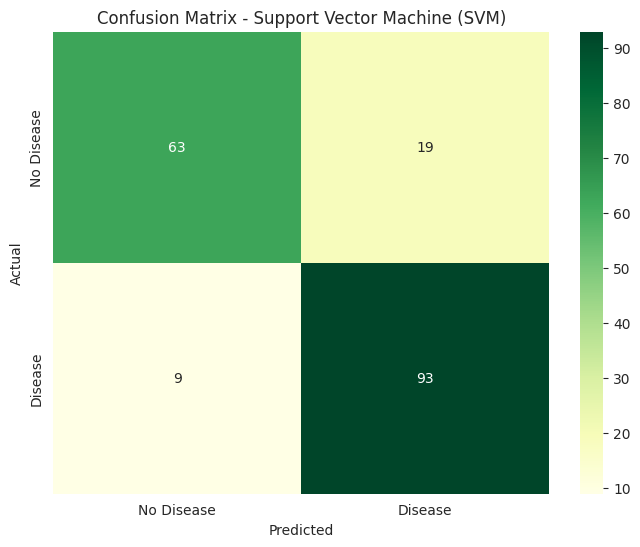

In [196]:
# Visualize the confusion matrix for the best model (SVM)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn',
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()

In [199]:
trained_models

{'LogReg': LogisticRegression(max_iter=5000),
 'RandomForest': RandomForestClassifier(random_state=42),
 'SVM': SVC(probability=True, random_state=42),
 'KNN': KNeighborsClassifier()}

### Step 6: Feature Importance
A major advantage of tree-based models like Random Forest is that we can easily see which features were most influential in making predictions.

In [203]:
#Random Forest
rf_model = trained_models['RandomForest']

rf_importance = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

print(rf_importance.head(10))

               Feature  Importance
2                 chol    0.141700
0                  age    0.123573
3               thalch    0.120292
4              oldpeak    0.106961
13          exang_True    0.090971
7   cp_atypical angina    0.075947
1             trestbps    0.074203
5                   ca    0.055085
6             sex_Male    0.041262
8       cp_non-anginal    0.030260


Interpretaion of Feature Importance (Random Forest):
1) Most Influential Features

- chol (Cholesterol level) — highest importance (0.142).
This means cholesterol level is the strongest predictor in your dataset. Variations in this feature most strongly affect whether a person is classified as having the condition (e.g., heart disease).

- age (Age) — second most important (0.124).
Older age contributes significantly to the model’s prediction, aligning with real-world medical trends.

- thalch (Maximum heart rate achieved) — third most important (0.120).
This indicates that heart rate during stress testing is a strong signal for classification.

2) Moderately Important Features

- oldpeak (ST depression induced by exercise) — 0.107 importance.
This measures changes in ECG during exercise — a crucial cardiac indicator.

- exang_True (Exercise-induced angina) — 0.091 importance.
Presence of angina during exercise increases the likelihood of a positive classification.

3) Less Important but Still Relevant

- cp_atypical angina (Chest pain type) — 0.076
Shows that chest pain type has moderate influence on model predictions.

- trestbps (Resting blood pressure) — 0.074
Affects predictions but less than cholesterol or age.

- ca (Number of major vessels colored by fluoroscopy) — 0.055
Indicates that structural abnormalities play a smaller but meaningful role.

- sex_Male — 0.041
Suggests gender differences exist but are not dominant in prediction.

- cp_non-anginal — 0.030
Minimal influence compared to other chest pain types.

Overall Insights

- The model relies most on cholesterol, age, and heart rate, confirming medically intuitive relationships.

- Exercise-related indicators (oldpeak, exang) also significantly impact predictions, showing the model captures cardiovascular stress responses.

- Gender and chest pain subtype play smaller roles, indicating they add nuance but not primary predictive power.

### Key steps undertaken:
- Established the goal of classification: predicting a binary outcome, where 0 denotes no disease and 1 denotes any recorded disease grade, created by merging target values greater than 0 into a single positive class to reflect clinical presence vs. absence.

- Performed focused EDA to understand distributions and relationships of core clinical attributes such as age, cholesterol, resting blood pressure, maximum heart rate, ST depression (oldpeak), chest‑pain types, exercise‑induced angina, number of vessels (ca), and sex.

- Completed manual preprocessing without Pipeline or ColumnTransformer, preparing numerical and encoded categorical features to make them model‑ready while keeping implementation transparent and simple.

- Trained and compared four models—Logistic Regression, Random Forest, SVM, and KNN—using consistent splits and evaluation settings for a fair comparison.

- Evaluated models with proper metrics (accuracy, precision, recall, and F1) to reflect clinical priorities, emphasizing high recall for the disease class to minimize false negatives.

- Interpreted model behavior to extract actionable insights, using feature importance to highlight which clinical variables most strongly influenced predictions.

### Model results:
- Logistic Regression delivered accuracy 0.83, with balanced precision/recall across classes (F1: 0.81 for class 0 and 0.85 for class 1).

- Random Forest achieved accuracy 0.85 and a strong disease‑class recall of 0.90, indicating better sensitivity to positive cases.

- SVM matched 0.85 accuracy with the highest disease‑class recall among linear‑style baselines at 0.91, supporting its suitability for this feature space.

- KNN reached 0.85 accuracy and the best disease‑class recall at 0.92, providing a competitive non‑parametric benchmark alongside SVM and Random Forest.

### Feature importance (Random Forest)
- Top drivers of model decisions were cholesterol, age, maximum heart rate (thalach), ST depression (oldpeak), exercise‑induced angina, chest‑pain subtypes, resting blood pressure, number of major vessels (ca), and sex.

- These variables align with well‑known cardiac risk indicators and stress‑test signals, reinforcing the clinical plausibility of the model’s reasoning.

### What this demonstrates
- Consolidating graded targets into a single positive class enables clinically meaningful binary risk prediction while preserving signal from all disease grades.

- Multiple learners converged around mid‑80% accuracy with elevated recall on the disease class, indicating robust detection of at‑risk patients under consistent evaluation.

- Feature‑level interpretation provides confidence that predictions are grounded in medically relevant attributes, making the model not only accurate but also interpretable for decision support.